<a href="https://colab.research.google.com/github/Amarjeet-1998/Spotify_Data_Analysis_project/blob/main/Spotify_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

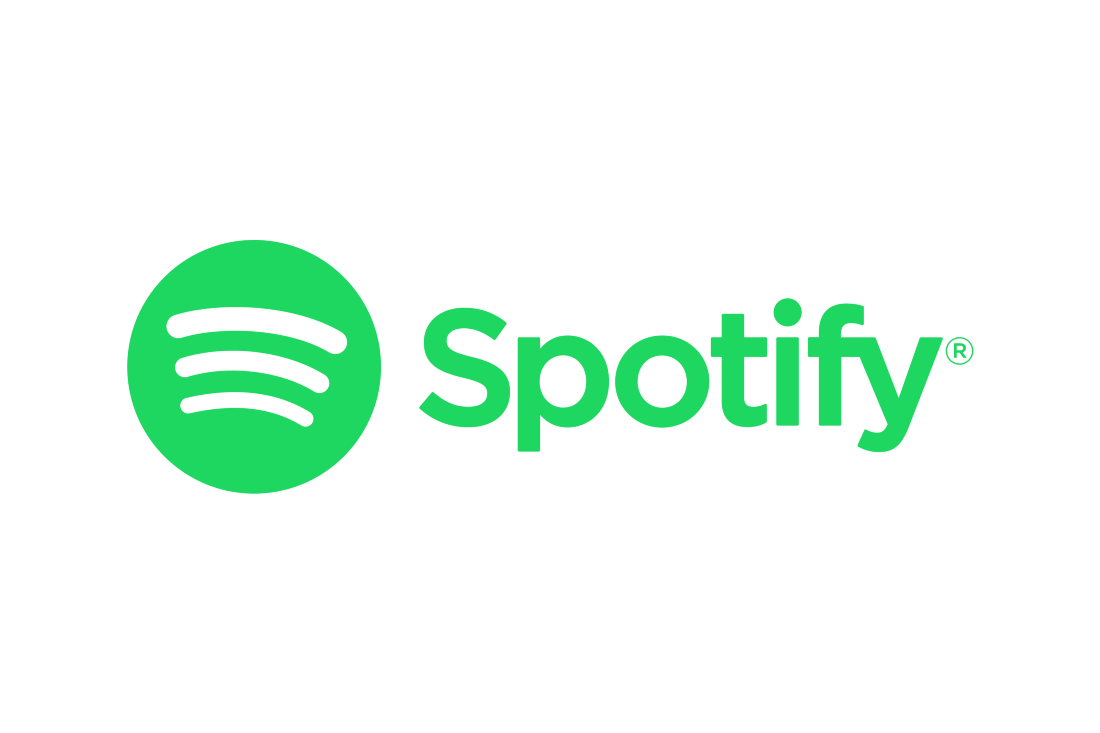

# **Spotify Exploratory Data Analysis**

Spotify turns out to provide a fantastic API for connecting to its massive collection of songs and their features. You may gain visual insights from your favorite songs, or incorporate a playback into your online application. There's also a strong song search engine and a recommendation system to help you listen to more of your favorite music.

Initiate by creating an account on the official Spotify website, which is completely free and requires very little work.

Then, go to your application dashboard and choose "Create an app." Fill in the blanks and get ready to explore.

Start your favorite Python IDE using your ClientID and Client Secret. It's time to start coding.

Instead of hitting the endpoints directly, we'll utilize SpotiPy, a wrapper over the Spotify API, to perform attractive one-line calls. Let's get things set up.

In [1]:
!pip install urllib3 --upgrade 
!pip install requests --upgrade 
!pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 28.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/co

In [3]:
import requests

CLIENT_ID = 'user id'
CLIENT_SECRET = 'user secret code'

AUTH_URL = 'https://accounts.spotify.com/api/token'

**The spotipy is then initialized. The Spotify developer's passwords are kept in the variables CLIENT_ID and CLIENT_SECRET of the Spotify object.**

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



# Scrape Artists and Tracks
Data querying is the next stage. Note that you can only get information on 50 tracks at a time. You may search for specific objects using the q argument in the sp.search() function.

In [5]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []

for i in range(0,1000,50):
  track_results =sp.search(q='year:2021', type='track', limit=50, offset=i)
  for i, t in enumerate(track_results['tracks']['items']):
    artist_name.append(t['artists'][0]['name'])
    artist_id.append(t['artists'][0]['id'])
    track_name.append(t['name'])
    track_id.append(t['id'])
    track_popularity.append(t['popularity'])

In [6]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM
1,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,89,7qmpXeNz2ojlMl2EEfkeLs
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,83,3TVXtAsR1Inumwj472S9r4
3,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,85,2jku7tDXc6XoB6MO2hFuqg
4,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4


In [7]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [8]:
track_df = track_df.assign(artist_popularity = artist_popularity, artist_genres=artist_genres,artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM,83,"[contemporary country, country]",4289394
1,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,89,7qmpXeNz2ojlMl2EEfkeLs,72,[pop],79725
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,83,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68799141
3,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,85,2jku7tDXc6XoB6MO2hFuqg,80,"[canadian hip hop, canadian trap, melodic rap,...",4798179
4,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68799141


# Numerical Features of Retrival Tracks

**You will then plunge into numerical analysis of music, but first, you will need to gather some information.**

**Fortunately, Spotify will offer you with detailed information on 82 million songs, which is ideal for our needs.
To begin, go to the Spotify API reference page to learn about the features that contribute to a track's profile.**

**Second, get the characteristics of the tracks and put them in the data frame.**

In [9]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)

In [10]:
print(track_features[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [11]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [12]:
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index = True)

In [37]:
tf_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.505,0.657,-5.240,0.0318,0.3730,0.001070,0.1260,0.252,196.000,3cBsEDNhFI9E82vPj3kvi3,178520,3
1,0.768,0.714,-5.110,0.0401,0.3520,0.000000,0.1500,0.842,131.443,4h4QlmocP3IuwYEj2j14p8,163026,4
2,0.849,0.424,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,2BcMwX1MPV6ZHP4tUT9uq6,242966,4
3,0.645,0.534,-10.800,0.0479,0.1570,0.000000,0.0863,0.463,105.020,3azJifCSqg9fRij2yKIbWz,226467,4
4,0.578,0.449,-6.349,0.2860,0.0618,0.000002,0.1190,0.100,136.006,65OVbaJR5O1RmwOQx0875b,192956,4


**Let's remove some few unnecessary columns and examine the data frames' structure:**

In [13]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
#cols_to_drop1 = ['track_id','artist_id']
cols_to_drop2 = ['key','mode','type','uri','track_href','analysis_url']
#track_df = track_df.drop(columns=cols_to_drop1)
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      996 non-null    float64
 1   energy            996 non-null    float64
 2   loudness          996 non-null    float64
 3   speechiness       996 no

In [14]:
track_df['artist_name'] = track_df['artist_name'].astype('string')
track_df['track_name'] = track_df['track_name'].astype('string')
track_df['track_id'] = track_df['track_id'].astype('string')
track_df['artist_id'] = track_df['artist_id'].astype('string')
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype('category')
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      996 non-null    float64 
 1   energy            996 non-null    float64 
 2   loudness          996 non-null    float64 
 3   speechin

# Show the most popular tracks/ artists

In [15]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
1,Sunroof,Nicky Youre
5,Until I Found You,Stephen Sanchez
13,Woman,Doja Cat
22,STAY (with Justin Bieber),The Kid LAROI
129,Where Are You Now,Lost Frequencies
11,traitor,Olivia Rodrigo
31,Shivers,Ed Sheeran
15,deja vu,Olivia Rodrigo
27,drivers license,Olivia Rodrigo
63,Cold Heart - PNAU Remix,Elton John


# **Who is most followed?**

In [16]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
413,105027250,89,Ed Sheeran,"['pop', 'uk pop']"
838,84845148,88,Ariana Grande,"['dance pop', 'pop']"
835,71810766,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
431,68799141,97,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
692,67441183,89,Justin Bieber,"['canadian pop', 'pop']"
115,62174229,100,Taylor Swift,['pop']
627,61647367,90,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
29,59065571,97,Bad Bunny,"['reggaeton', 'trap latino']"
841,57348736,90,BTS,"['k-pop', 'k-pop boy group']"
366,52530301,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."


**Let's examine how many genres the track_df data frame contains:**

In [17]:
def to_1D(series):
  return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      282
rap                      188
contemporary country      97
trap                      86
hip hop                   85
country                   82
dance pop                 69
pop rap                   54
nueva musica mexicana     51
country road              47
viral rap                 41
sad sierreno              38
melodic rap               36
canadian pop              35
southern hip hop          34
corrido                   33
r&b                       32
canadian hip hop          32
musica mexicana           31
electropop                31
dtype: int64

# Top Genres

Text(0.5, 1.0, 'Top genres')

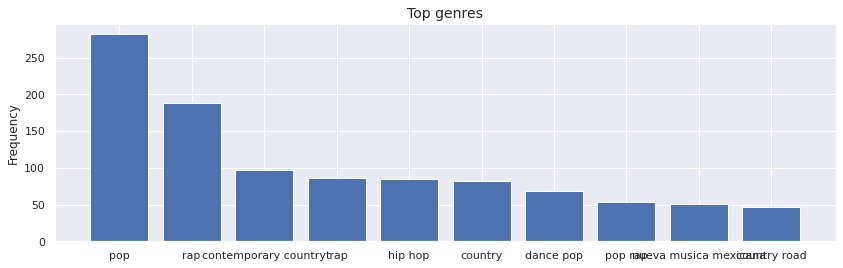

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
       to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

# Top 20 Artists(by followers) for each of top 10 genres

**Searching for the top 20 artists filtered by the number of the followers**

In [19]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Luke Bryan,contemporary country
3,Migos,trap
4,Drake,hip hop
5,Luke Bryan,country
6,Ariana Grande,dance pop
7,Migos,pop rap
8,Christian Nodal,nueva musica mexicana
9,Luke Bryan,country road


# Top 20 songs (by Track_popularity) for each of top 10 genres

Searching for the top 20 filtered by popularity for every top 10 genres: 

In [20]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending= False)[['track_popularity','track_name','artist_name','artist_genres','track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre =[]
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name': row['track_name'],'track_popularity':row['track_popularity'],'artist_name': row['artist_name'],'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Sunroof,89,Nicky Youre,pop
1,The Color Violet,85,Tory Lanez,rap
2,Wasted On You,82,Morgan Wallen,contemporary country
3,The Color Violet,85,Tory Lanez,trap
4,Knife Talk (with 21 Savage ft. Project Pat),83,Drake,hip hop
5,Wasted On You,82,Morgan Wallen,country
6,Woman,87,Doja Cat,dance pop
7,The Color Violet,85,Tory Lanez,pop rap
8,Fuga Pa Cali 2,80,Grupo Los de la O,nueva musica mexicana
9,Buy Dirt,79,Jordan Davis,country road


# Track's features analysis

**Visualizing Features of the Tracks**

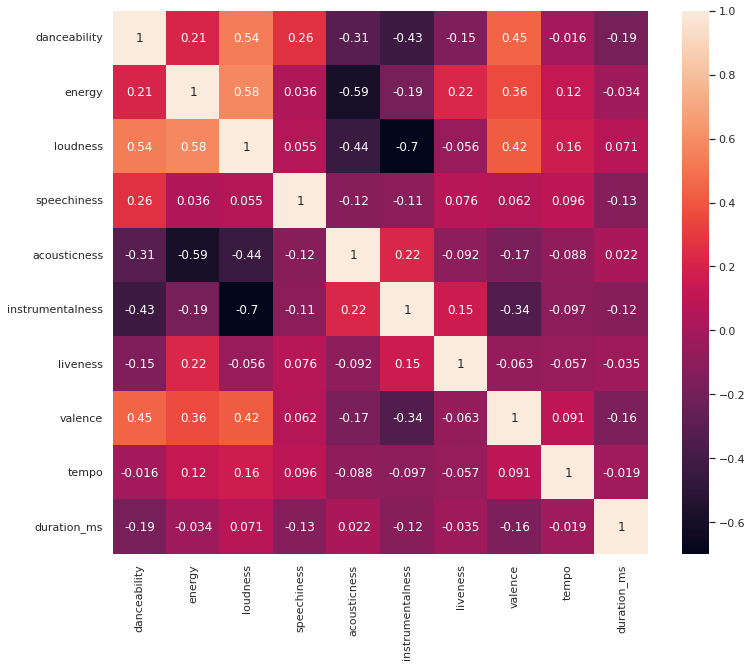

In [23]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot = True)
plt.show()


**A multivariate KDE might also be plotted for a specific pair of variables:**

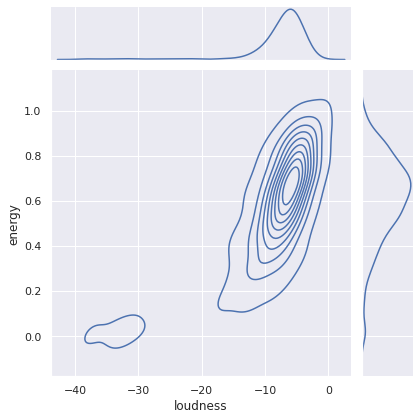

In [24]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data = tf_df, x="loudness", y="energy", kind='kde')


**What distinguishes the most popular tracks from the rest of the dataset? Here, we will learn by producing a feature portrait of the relevant sets based on the mean values of selected characteristics.**

# Feature portrait of the most popular songs

In [28]:
# ToDo create a dataframe with features of top 100 songs
feat_cols = ['danceability','energy','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

In [30]:
from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index = True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
mean_vals

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.665300,0.657998,0.080682,0.231971,0.068440,0.153737,0.476642
1,0.638423,0.611935,0.115883,0.266667,0.061672,0.177819,0.485334


**The most famous songs appear to be slightly more rhythmic and have more positivity. They're also devoid of efficiency, effectiveness and vibrancy.**

In [32]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()




# Get track recommendations

**Our research concludes with music recommendations based on artist_id, genre, and track id. Spotify never runs out of content recommendations since the output is randomized.**

In [35]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Imagine Dragons It's Time
Linkin Park In the End
Elton John This Train Don't Stop There Anymore
Daniel Caesar Best Part (feat. H.E.R.)
James Bay Let It Go
Adam Lambert Runnin'
BANNERS Into The Storm
YG Who Do You Love?
Coldplay Something Just Like This - Tokyo Remix
Elton John I Guess That's Why They Call It The Blues
Avicii Hey Brother
Dreezy Body
Travis Scott Know No Better (feat. Travis Scott, Camila Cabello & Quavo)
David Guetta Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack)
Owl City When Can I See You Again? - From "Wreck-It Ralph"/Soundtrack Version
The Chainsmokers Sick Boy
P!nk What About Us
Charli XCX 1999
Huey Lewis & The News Naturally
Imagine Dragons Rise Up
Maroon 5 Moves Like Jagger - Studio Recording From "The Voice" Performance
Clean Bandit Solo (feat. Demi Lovato)
The Association Never My Love - Mono 45 Mix
Art Garfunkel jr. The Sound Of Silence
Macklemore Glorious (feat. Skylar Grey)
Trey Songz Slow Motion
Lady Gaga Applause
Joshua Micah Let The Light In
Lukas Gr

**Thank you**